In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../../../data/chocolate.csv')

In [3]:
df = df.dropna()

In [4]:
df.drop(df.loc[df['Rating']==2.6].index, inplace=True)

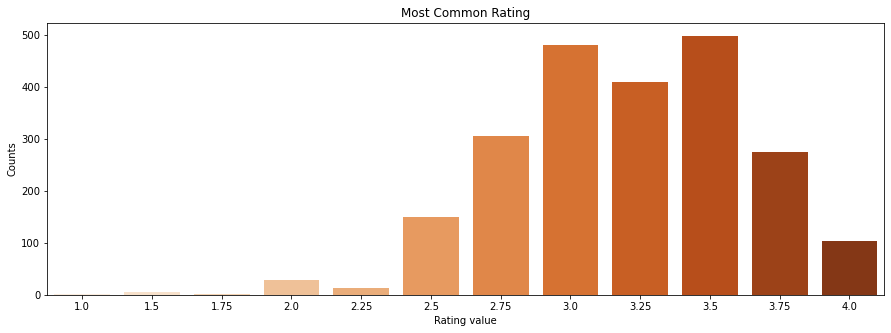

In [5]:
rating_counts = df['Rating'].value_counts()

plt.figure(figsize=(15,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Oranges")
plt.xlabel("Rating value")
plt.ylabel("Counts")
plt.title("Most Common Rating")
plt.savefig('../../../images/most_common_rating.png');

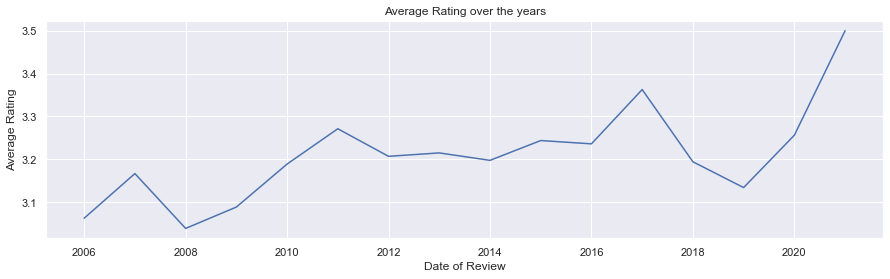

<Figure size 432x288 with 0 Axes>

In [6]:
ratemean = df.groupby('Review Date').aggregate({'Rating':'mean'})
ratemean = ratemean.reset_index()

sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='Review Date', y='Rating', data=ratemean)

plt.xlabel("Date of Review")
plt.ylabel("Average Rating")
plt.title("Average Rating over the years")
plt.show()
plt.savefig('../../../images/average_rating_over_years.png');

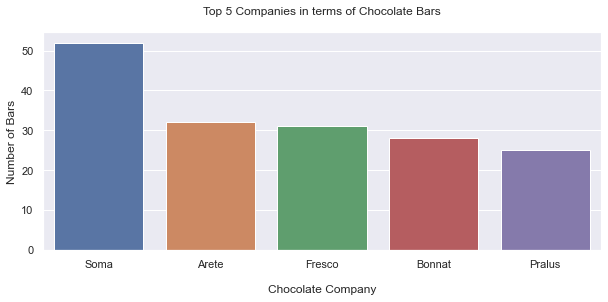

<Figure size 432x288 with 0 Axes>

In [7]:
d = df['Company (Manufacturer)'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index()
\
sns.set()
plt.figure(figsize=(10,4))
sns.barplot(x='index', y='Company (Manufacturer)', data=d)
plt.xlabel("\nChocolate Company")
plt.ylabel("Number of Bars")
plt.title("Top 5 Companies in terms of Chocolate Bars\n")
plt.show()
plt.savefig('../../../images/top_5_companies_chocolate_bars.png');

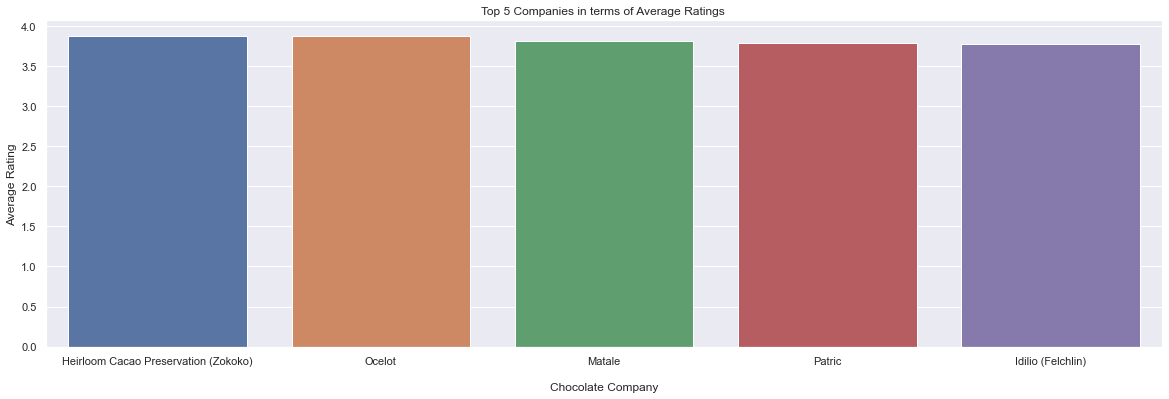

In [32]:
d2 = df.groupby('Company (Manufacturer)').aggregate({'Rating':'mean'})
d2 = d2.sort_values('Rating', ascending=False).head(5)
d2 = d2.reset_index()

sns.set()
plt.figure(figsize=(20, 6))
sns.barplot(x='Company (Manufacturer)', y='Rating', data=d2)
plt.xlabel("\nChocolate Company")
plt.ylabel("Average Rating")
plt.title("Top 5 Companies in terms of Average Ratings ")
plt.savefig('../../../images/top_5_companies_average_ratings.png');